In [1]:
from common.ETLBase import PipelineBuilder, PipeConfigBuilder

In [2]:
# DO THIS IF CODE Config and Pipe Connection in define in the main function 
def func(code_str):
    exec(code_str, globals())

In [3]:
pipe_config = PipeConfigBuilder()

In [4]:
pipe_config.setups(obj='global', a = 1, b = 2, c = 3, d = 4)

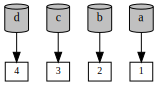

In [5]:
pipe_config.view(summary=False)

- Allow visualization of configuration 

In [ ]:
config = PipeConfigBuilder()

In [ ]:
def one_two(add_t=0):
    return 5 + add_t, 2
def test(b=2):
    return b + 1

In [ ]:
add_t = config.add('add_t', 3)
x = config.add('x', 5)
config.view(summary=False)


In [ ]:
exec('t = 4') 
# 可以用這個方法把要assign 的變數都assign 好 ! # 讓config 可以直接以一個dictionary去建立 
# 或是pass in **kwargs的方式吃進來。

In [ ]:
t

In [ ]:
pipe = PipelineBuilder(config)
# add_t = lambda: 3
# add_t = pipe.add(add_t, method_alias = 'add_t=3', output_alias = 'add_t', color='gray')()
b, d = pipe.add(one_two, output_alias=['b', 'd'], n_out = 2)(add_t = add_t)
d = pipe.add(test, output_alias = 'd')(b=b)
pipe.view(summary=False)

In [ ]:
d.get()

# Functions

In [ ]:
from experiments.ex3.preprocess_modules import *

# Build Pipeline 

In [ ]:
import os
origin_path = 'data/source'
sample_path = 'data/sample'

tmp_path = 'data/tmp' # 'data/tmp'
result_path = 'data/result' # 'data/result'


# ETL configuration >

# easily assign configuration using 'Config Builder Object' 
# it initialize using pipe_config = PipeConfigBuilder()
# add config variable using var = pipe_config.add(name='var', value=50)
# 

CATEGORY_COLS = ['chid', 'bnsfg', 'iterm', 'mcc', 'scity']
NUMERIC_COLS = ['bnspt', 'timestamp_0', 'timestamp_1', 'objam']

config = PipeConfigBuilder()

config.setups(
    obj='global',
    chid_file=os.path.join(origin_path, 'sample_chid.txt'),
    cdtx_file=os.path.join(origin_path, 'sample_zip_if_cca_cdtx0001_hist.csv'),
    cust_f_file=os.path.join(origin_path, 'sample_zip_if_cca_cust_f.csv'),
    category_cols=CATEGORY_COLS,
    numeric_cols=NUMERIC_COLS,
    cust_category_cols=['chid', 'masts', 'educd', 'trdtp', 'poscd'],
    cust_numeric_cols=['slam', 'first_mob', 'constant_change', 'sum_l2_ind',
                  'sum_u2_ind', 'constant_l2_ind', 'constant_u4_ind',
                  'growth_rate', 'monotone_down', 'monotone_up', 'data_dt'],
    target_cols=['chid', 'data_dt', 'objam_sum', 'objam_mean', 'trans_count', 'objam_mean_M3'],
    time_column_data_dt='data_dt',
    time_column_csmdt='csmdt',
    result_column_timestamp_1='timestamp_1',
    result_column_timestamp_0='timestamp_0',
    result_column_timestamp='timestamp',
    LEFT='left',
    INNER='inner',
    n_sample=50,
    window_size=120,
    test_size=2
)

#chid_file = config.add('chid_file', os.path.join(origin_path, 'sample_chid.txt'))
#cdtx_file = config.add('cdtx_file', os.path.join(origin_path, 'sample_zip_if_cca_cdtx0001_hist.csv'))
#cust_f_file = config.add('cust_f_file', os.path.join(origin_path, 'sample_zip_if_cca_cust_f.csv'))

#n_sample = config.add('n_sample', 50) #50
#window_size = config.add('window_size', 120)# 120 
#test_size = config.add('test_size', 2)

#category_cols = config.add('category_cols', CATEGORY_COLS) # ETL Variable 
#numeric_cols = config.add('numeric_cols', NUMERIC_COLS) # ETL Variable 

#LEFT = config.add('LEFT','left')
#INNER = config.add('INNER', 'inner')
#time_column_data_dt = config.add('time_column_data_dt', 'data_dt')
#time_column_csmdt = config.add('time_column_csmdt','csmdt')
#result_column_timestamp_1 = config.add('result_column_timestamp_1', 'timestamp_1')
#result_column_timestamp_0 = config.add('result_column_timestamp_0', 'timestamp_0')
#result_column_timestamp = config.add('result_column_timestamp', 'timestamp')

#cust_numeric_cols = config.add('cust_numeric_cols', ['slam', 'first_mob', 'constant_change', 'sum_l2_ind',
#                  'sum_u2_ind', 'constant_l2_ind', 'constant_u4_ind',
#                  'growth_rate', 'monotone_down', 'monotone_up', 'data_dt'])
#cust_category_cols = config.add('cust_category_cols', ['chid', 'masts', 'educd', 'trdtp', 'poscd'])
#target_cols = config.add('target_cols', ['chid', 'data_dt', 'objam_sum', 'objam_mean', 'trans_count', 'objam_mean_M3'])

# < ETL configuration

sparse_feat = ['chid', 'bnsfg', 'iterm', 'mcc', 'scity']
dense_feat = ['bnspt', 'timestamp_0', 'timestamp_1', 'objam']
USE_CHID = True

sparse_dense_setting_generator = GenerateSparseDenseSetting(
    category_cols=CATEGORY_COLS, 
    sparse_feat=sparse_feat, 
    numeric_cols=NUMERIC_COLS, 
    dense_feat=dense_feat, 
    USE_CHID=USE_CHID
)

In [ ]:
pipe = PipelineBuilder(config)

# Input: 'output_name', method, kwargs of the method 
chids = pipe.add(load_chids, output_alias = 'chids')(chid_file = chid_file)

sampled_chids = pipe.add(
    sample_chids, 
    output_alias = 'sampled_chids', 
    result_dir = os.path.join(sample_path,'sampled_chids.npy')
)(chids, n_sample = n_sample)
pipe.view(summary = False)

In [ ]:
pipe.view_dependency('sample_chids', summary=False)

In [ ]:
chid_to_nid_map = pipe.add(build_chid_to_nid_map, output_alias = 'chid_to_nid_map')(
    sampled_chids
)
df_cdtx = pipe.add(load_cdtx, output_alias = 'df_cdtx')(
    sampled_chids, 
    cdtx_file = cdtx_file
)
df_cdtx = pipe.add(convert_uid_to_nid, output_alias = 'df_cdtx')(
    df_cdtx, 
    chid_to_nid_map
)
df_cdtx = pipe.add(add_month, 
                 output_alias = 'df_cdtx', 
                 result_dir = os.path.join(tmp_path, 'df_cdtx.feather')
                )(df_cdtx)

df_full_y_sum = pipe.add(
    make_chid_x_month_table, 
    output_alias = 'df_full_y_sum'
)(
    df_cdtx
)

df_cdtx_monthly_objam = pipe.add(calculate_monthly_target, output_alias = 'df_cdtx_monthly_objam')(
    df_cdtx
)

df_full_y_sum = pipe.add(merge_with_another_table, output_alias = 'df_full_y_sum')(
    df_full_y_sum, 
    df_cdtx_monthly_objam, 
    join_method=LEFT
)



df_cust_f = pipe.add(load_cust_f, output_alias = 'df_cust_f')(
    sampled_chids, 
    cust_f_file = cust_f_file
)

df_cust_f = pipe.add(
    convert_uid_to_nid, 
    output_alias = 'df_cust_f', 
    result_dir = os.path.join(tmp_path, 'df_cust_f.feather')
)(
    df_cust_f, 
    chid_to_nid_map
)

df_full_y_sum = pipe.add(merge_with_another_table, output_alias = 'df_full_y_sum')(
    df_full_y_sum, df_cust_f, join_method=INNER)



df_full_y_sum = pipe.add(add_mean_of_previous_two_months, output_alias = 'df_full_y_sum')(
    df_full_y_sum)



df_full_y_sum = pipe.add(cast_time_column_to_np_datatime64, output_alias = 'df_full_y_sum')(
    df_full_y_sum, time_column = time_column_data_dt)



df_cdtx = pipe.add(cast_time_column_to_np_datatime64, output_alias = 'df_cdtx')(
    df_cdtx, time_column = time_column_csmdt)




df_cdtx = pipe.add(add_duration_since_20180101, output_alias = 'df_cdtx')(
    df_cdtx, time_column = time_column_csmdt, result_column=result_column_timestamp_1)


df_cdtx = pipe.add(add_duration_since_last_trans, output_alias = 'df_cdtx')(
    df_cdtx, time_column = time_column_csmdt, result_column=result_column_timestamp_0)


df_input, feature_map = pipe.add(
    extract_feature_cols_and_encode_categoricals, 
    n_out = 2, 
    output_alias = ['df_input', 'feature_map'], 
    result_dir=[
                os.path.join(tmp_path, 'df_input.feather'),
                os.path.join(tmp_path, 'feature_map.npy')
            ]
)(
    df_cdtx, 
    numeric_cols=numeric_cols,
    category_cols=category_cols
)




df_feat_input, cust_feature_map = pipe.add(
    extract_feature_cols_and_encode_categoricals, 
    n_out = 2, 
    output_alias = ['df_feat_input', 'cust_feature_map'], 
    result_dir=[
                os.path.join(tmp_path, 'df_feat_input.1.feather'),
                os.path.join(tmp_path, 'cust_feature_map.npy')
            ]
)(
    df_cust_f, 
    numeric_cols=cust_numeric_cols,
    category_cols=cust_category_cols
)

df_feat_input = pipe.add(cast_time_column_to_np_datatime64, output_alias = 'df_feat_input')(
    df_feat_input, time_column = time_column_data_dt)




df_feat_input = pipe.add(
    add_duration_since_20180101, 
    output_alias = 'df_feat_input', 
    result_dir = os.path.join(tmp_path, 'df_feat_input.2.feather')
)(
    df_feat_input, time_column = time_column_data_dt, result_column=result_column_timestamp)

df_y = pipe.add(extract_target_columns, output_alias = 'df_y')(
    df_full_y_sum,
    target_cols=target_cols,  # 'shop_count'
)






df_y = pipe.add(
    add_duration_since_20180101, 
    output_alias = 'df_y', 
    result_dir = os.path.join(tmp_path, 'df_y.feather')
)(
    df_y, time_column = time_column_data_dt, result_column=result_column_timestamp)

pipe.view(summary=False)

In [ ]:
cust_feature_map.get(verbose=True)

In [ ]:
pipe.view_dependency('calculate_monthly_target', summary=False)

In [ ]:

# split_data
# add_objam_mean_M3_diff_as_new_target
# extract_x_f_y_columns

x_train, x_test, f_train, f_test, y_train, y_test = pipe.add(
    split_data, 
    n_out = 6,
    output_alias = ['x_train', 'x_test', 'f_train', 'f_test', 'y_train', 'y_test'],
    result_dir=[
                os.path.join(tmp_path, 'x_train.npy'),
                os.path.join(tmp_path, 'x_test.npy'),
                os.path.join(tmp_path, 'f_train.npy'),
                os.path.join(tmp_path, 'f_test.npy'),
                os.path.join(tmp_path, 'y_train.npy'),
                os.path.join(tmp_path, 'y_test.npy')
            ]
)(df_input, df_feat_input, df_y, window_size = window_size, test_size = test_size)


y_train, y_test, y_columns = pipe.add(
    add_objam_mean_M3_diff_as_new_target, 
    n_out = 3,
    output_alias = ['y_train', 'y_test', 'y_columns'],
    result_dir = [
        os.path.join(tmp_path, 'y_train.npy'),
        os.path.join(tmp_path, 'y_test.npy'),
        os.path.join(tmp_path, 'y_columns.npy')
    ]
)(df_y, y_train, y_test)

columns = pipe.add(extract_x_f_y_columns, output_alias = 'columns')(
    df_input, df_feat_input, y_columns
)


'''
for output in [x_train, x_test, f_train, f_test, y_train, y_test, columns, feature_map, cust_feature_map, chid_to_nid_map]:
    output.get()
'''
pipe.view(summary=False)

In [ ]:


sparse_dims, sparse_index, dense_dims, dense_index = pipe.add(
    sparse_dense_setting_generator.process,
    method_alias = 'generate_sparse_dense_setting',
    n_out = 4, 
    output_alias = ['sparse_dims', 'sparse_index', 'dense_dims', 'dense_index']
)(
    feature_map, chid_to_nid_map
)

x_train_sparse, x_train_dense, x_test_sparse, x_test_dense = pipe.add(
    ProcessX.process,
    method_alias = 'ProcessX.process',
    n_out = 4, 
    output_alias = ['x_train_sparse', 'x_train_dense', 'x_test_sparse', 'x_test_dense']
)(
    x_train, x_test, sparse_index, dense_index
)

train_objmean, train_tscnt, train_label_0, test_objmean, test_tscnt, test_label_0 = pipe.add(
    ProcessY.process,
    method_alias = 'ProcessY.process',
    n_out = 6, 
    output_alias = ['train_objmean', 'train_tscnt', 'train_label_0', 'test_objmean', 'test_tscnt', 'test_label_0']
)(
    y_train, y_test, columns
)

train_dataset = pipe.add(
    build_TensorDataset,
    output_alias = 'train_dataset'
)(
    x_train_dense, x_train_sparse, train_objmean, train_tscnt, train_label_0
)
    
test_dataset = pipe.add(
    build_TensorDataset,
    output_alias = 'test_dataset'
)(
    x_test_dense, x_test_sparse, test_objmean, test_tscnt, test_label_0
)
pipe.view(summary=False)

In [ ]:
pipe.view_dependency('split_data', summary=False, gap=1)

In [ ]:
test_dataset.run(verbose=True)